In [1]:
import numpy as np
from preprocessing import preprocess_corpus
from src.ir_evaluation import Evaluator
from vectoriel import Vectoriel
from evaluation_functions import load_data, plot_precision_recall

## 2. Modèle vectoriel

In [ ]:
datasets = ['cacm', 'cisi', 'cran', 'med', 'lisa', 'time']
# datasets = ['cacm', 'cisi', 'cran', 'med']
subplot = 320

In [ ]:
dataset, queries, ground_truth = load_data('med')
stop_list = np.genfromtxt('data/stoplist/stoplist-english.txt', dtype='str')
dataset_bagwords = preprocess_corpus(dataset, stop_list, stop_words=True, stemm=True, bag_words=True)

ground_truth_dict = dict()
ground_truth_dict['groundtruth'] = ground_truth


In [4]:
vector = Vectoriel(dataset_bagwords)

## TF-IDF Linear index

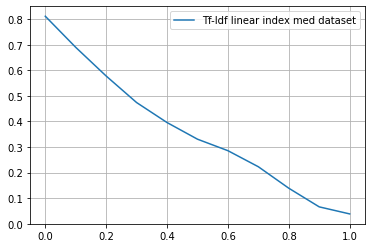

In [5]:
linear_index = vector.index_construction(dataset_bagwords)
eval_all_queries = vector.search_all_queries(queries, inverted=False)
# Evaluate performances (recall precision)
eval_ensembliste_linear = Evaluator(retrieved=eval_all_queries, relevant=ground_truth_dict)
evaluation_linear = eval_ensembliste_linear.evaluate_pr_points()
plot_precision_recall([evaluation_linear], [f'Tf-Idf linear index med dataset'])

## TF-IDF Inverted index

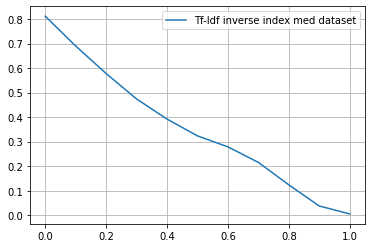

In [6]:
inverted_index_tfidf = vector.inverted_index_construction(dataset_bagwords)
eval_all_queries_inverted_tf_idf = vector.search_all_queries(queries, inverted=True)
# Evaluate performances (recall precision)
eval_ensembliste_linear = Evaluator(retrieved=eval_all_queries_inverted_tf_idf, relevant=ground_truth_dict)
evaluation_inverted_tfidf = eval_ensembliste_linear.evaluate_pr_points()
plot_precision_recall([evaluation_inverted_tfidf], [f'Tf-Idf inverse index med dataset'])

## TF Inverted index

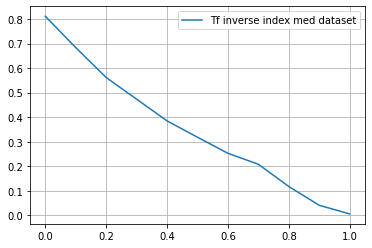

In [7]:
inverted_index_tf = vector.inverted_index_construction(dataset_bagwords, tf_idf=False)
eval_all_queries_inverted_tf = vector.search_all_queries(queries, inverted=True)
# Evaluate performances (recall precision)
eval_ensembliste_linear = Evaluator(retrieved=eval_all_queries_inverted_tf, relevant=ground_truth_dict)
evaluation_inverted_tf = eval_ensembliste_linear.evaluate_pr_points()
plot_precision_recall([evaluation_inverted_tf], [f'Tf inverse index med dataset'])

## Compare TF and TF-IDF (Inverted index)

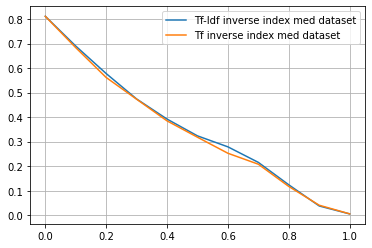

In [8]:
plot_precision_recall([evaluation_inverted_tfidf, evaluation_inverted_tf], [f'Tf-Idf inverse index med dataset', f'Tf inverse index med dataset'])
